## Importando os dados
Importo os dados e transformo e organizo as datas por periodo(da data mais recente para a mais distante) e gera uma novo arquivo no formato csv

In [52]:
import pandas as pd


pd.options.display.max_rows = 50


arquivo = pd.read_excel(r'Notas_fiscais_vendas.xlsx')
arquivo['Data'] = pd.to_datetime(arquivo['Data'])
arquivo['Data'] = arquivo['Data'].dt.strftime('%Y/%m/%d')
arquivo.to_csv('Notas_fiscais_vendas.csv',sep=";", index=False)

print(arquivo)

     Unnamed: 0          Produto   Quantidade    Tipo        Data
0             0    CARCAÇA BOVINA       152.0     boi  2024/07/04
1             1  DIANTEIRO DE BOI        42.0     boi  2024/07/04
2             2        COSTELINHA        17.0   porco  2024/07/04
3             3    CARCAÇA BOVINA       131.4     boi  2024/07/04
4             4      COXA S/ COXA        23.0  frango  2024/07/04
..          ...               ...         ...     ...         ...
774         774     CARCAÇA SUINA       100.0   porco  2023/07/11
775         775      COXA S/ COXA        20.0  frango  2023/07/11
776         776             MOELA        16.8  frango  2023/07/11
777         777  DIANTEIRO DE BOI       164.0     boi  2023/07/11
778         778    CARCAÇA BOVINA       143.5     boi  2023/07/09

[779 rows x 5 columns]


# Criando o primeiro grafico
O objetivo desse grafico é mostar a quantidade de quilos que foi vendido ao longo do ano já incluindo com as perdas com o osso e etc

In [53]:
import pandas as pd

pd.options.display.max_rows = 1000
arquivo = pd.read_csv(r'Notas_fiscais_vendas.csv', sep=";")
arquivo['Data'] = pd.to_datetime(arquivo['Data'])
df = arquivo.sort_values(by='Data', ascending=False)
df.to_csv('Notas_fiscais_vendas.csv',sep=";", index=False)
print(df)

     Unnamed: 0                                   Produto   Quantidade  \
0             0                             CARCAÇA BOVINA     152.000   
3             3                             CARCAÇA BOVINA     131.400   
4             4                               COXA S/ COXA      23.000   
1             1                           DIANTEIRO DE BOI      42.000   
2             2                                 COSTELINHA      17.000   
8             8                            PEITO DE FRANGO      26.000   
9             9                                     PERNIL      20.963   
5             5                              CARCAÇA SUINA      80.000   
7             7                             CARCAÇA BOVINA     124.000   
6             6                           DIANTEIRO DE BOI      41.000   
10           10                              FILE DE PEITO      26.000   
11           11                             CARCAÇA BOVINA     144.000   
12           12                       

In [54]:
from matplotlib import pyplot as plt
import pandas as pd

#função para calcular as perdas(como osso, sangue, gordura e etc.)
def descontar(quantidadeOriginal, porcentagem):
    quantidadeDespesa = quantidadeOriginal*porcentagem
    quantidadeDespesa = quantidadeDespesa/100
    quntidadeTotal = quantidadeOriginal-quantidadeDespesa
    return quntidadeTotal


arquivo = pd.read_csv(r'Notas_fiscais_vendas.csv', sep=";")
arquivo['Quantidade'] = arquivo['Quantidade'].replace(',', '.', regex=True)
arquivo['Quantidade'] = pd.to_numeric(arquivo["Quantidade"])

cnBoi = arquivo[arquivo['Tipo'] == 'boi']
cnPorco = arquivo[arquivo['Tipo'] == 'porco']
cnfrango = arquivo[arquivo['Tipo'] == 'frango']


#soma a quantidade de carne comparada durante todo o periodo analisado
quantidadeBoi = sum(cnBoi['Quantidade'])
quantidadePorco = sum(cnPorco['Quantidade'])
quantidadeFrango = sum(cnfrango['Quantidade'])


#dados já tratados com as perdas
boiDescontado = descontar(quantidadeBoi,35)
porcoDescontado = descontar(quantidadePorco,22)

protutos =["Boi", "Porco", "Frango"]

arquivo.to_csv('Notas_fiscais_vendas.csv',sep=";", index=False)




## Grafico antes da perda

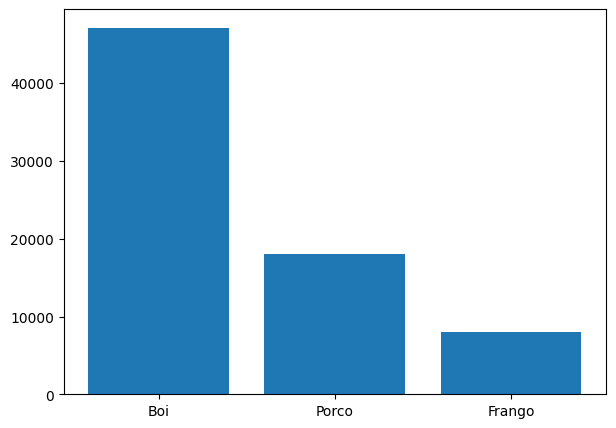

In [55]:
from matplotlib import pyplot as plt

labels = ["Boi", "Porco", "Frango"]
valores = [quantidadeBoi, quantidadePorco, quantidadeFrango]
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(labels,valores)
plt.show()

## Grafico depois de calcular as perdas

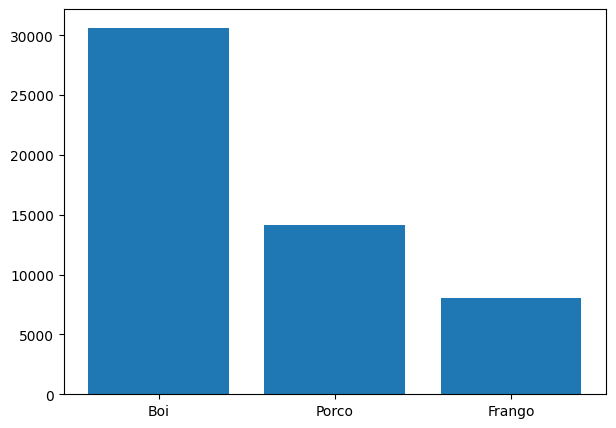

No período em análise foram vendidas 30,649 toneladas de carne de boi, 14,109 toneladas de carne de porco e 8,010 toneladas de carne de frango.


In [56]:
from matplotlib import pyplot as plt

labels = ["Boi", "Porco", "Frango"]
valores = [boiDescontado, porcoDescontado, quantidadeFrango]
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(labels, valores)
plt.show()

print(f"No período em análise foram vendidas {boiDescontado:,.0f} toneladas de carne de boi, {porcoDescontado:,.0f} toneladas de carne de porco e {quantidadeFrango:,.0f} toneladas de carne de frango.")


# Separando as vendas por meses


In [59]:
import pandas as pd

arquivo = pd.read_csv(r'Notas_fiscais_vendas.csv', sep=";")

arquivo['Data'] = pd.to_datetime(arquivo['Data'], dayfirst=True, errors='coerce')

for mes in range(1, 13):
    df_mes = arquivo[arquivo['Data'].dt.month == mes]
    nome_arquivo = f"vendas_mes_{mes}.csv"
    df_mes.to_csv(nome_arquivo, sep=";", index=False)

print("Tabelas mensais criadas com sucesso.")


Tabelas mensais criadas com sucesso.


### Vendas julho 2024

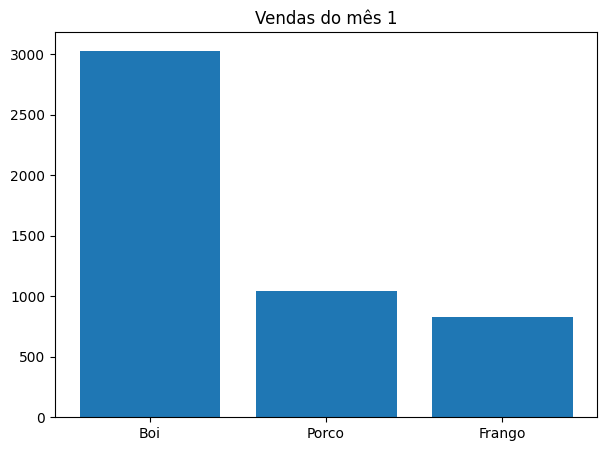

Vendas 2024
No período em análise foram vendidas 3,030 toneladas de carne de boi, 1,044 toneladas de carne de porco e 827 toneladas de carne de frango.


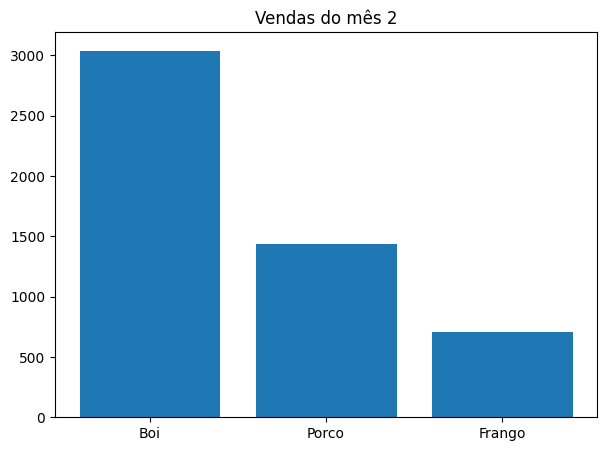

 Teste sla
No período em análise foram vendidas 3,039 toneladas de carne de boi, 1,435 toneladas de carne de porco e 708 toneladas de carne de frango.


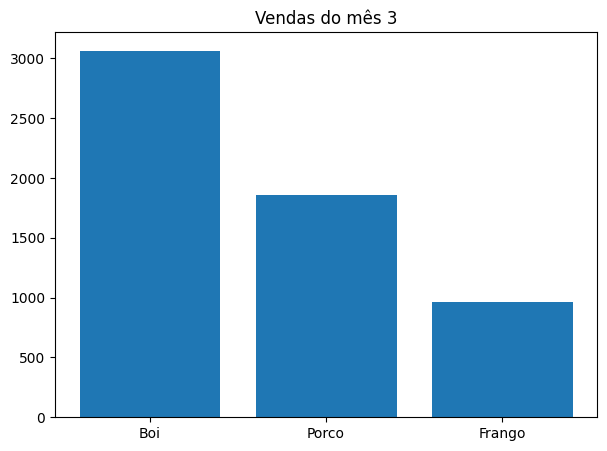

No período em análise foram vendidas 3,064 toneladas de carne de boi, 1,855 toneladas de carne de porco e 963 toneladas de carne de frango.


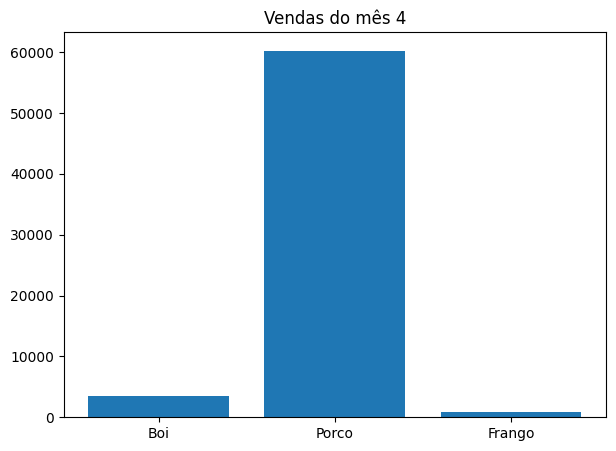

No período em análise foram vendidas 3,433 toneladas de carne de boi, 60,274 toneladas de carne de porco e 934 toneladas de carne de frango.


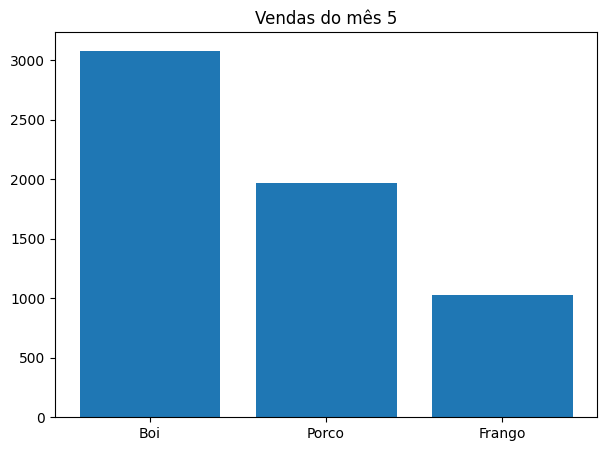

No período em análise foram vendidas 3,080 toneladas de carne de boi, 1,972 toneladas de carne de porco e 1,026 toneladas de carne de frango.


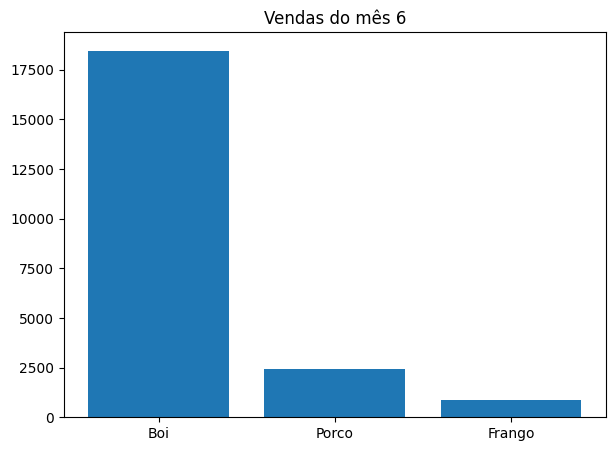

No período em análise foram vendidas 18,463 toneladas de carne de boi, 2,416 toneladas de carne de porco e 883 toneladas de carne de frango.


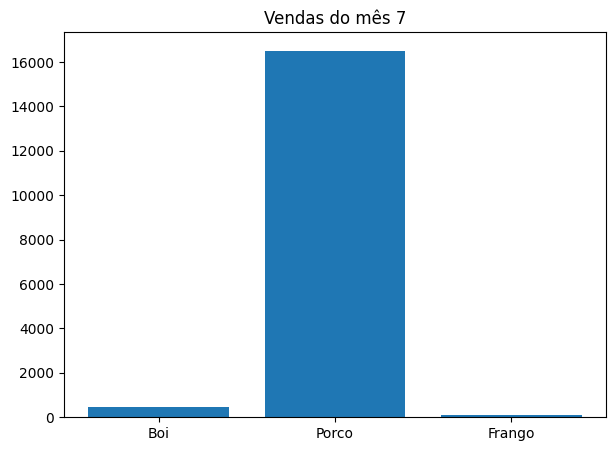

No período em análise foram vendidas 449 toneladas de carne de boi, 16,517 toneladas de carne de porco e 98 toneladas de carne de frango.


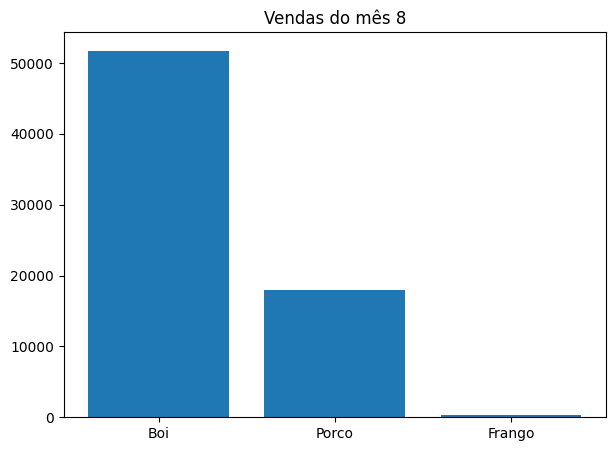

No período em análise foram vendidas 51,754 toneladas de carne de boi, 17,955 toneladas de carne de porco e 387 toneladas de carne de frango.


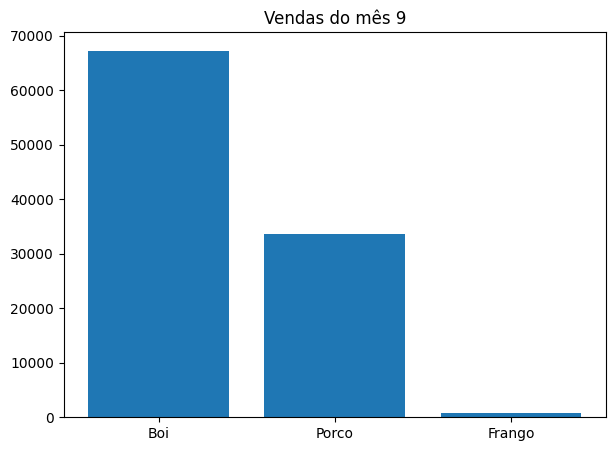

No período em análise foram vendidas 67,280 toneladas de carne de boi, 33,683 toneladas de carne de porco e 700 toneladas de carne de frango.


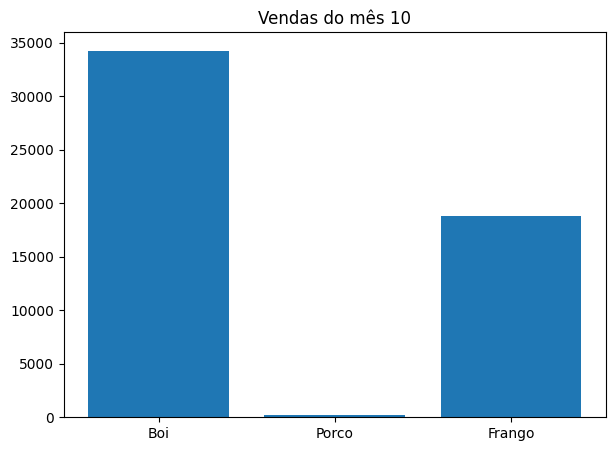

No período em análise foram vendidas 34,271 toneladas de carne de boi, 244 toneladas de carne de porco e 18,817 toneladas de carne de frango.


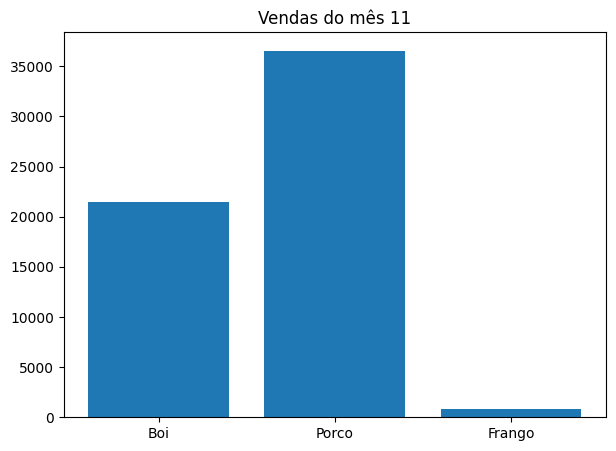

No período em análise foram vendidas 21,486 toneladas de carne de boi, 36,564 toneladas de carne de porco e 825 toneladas de carne de frango.


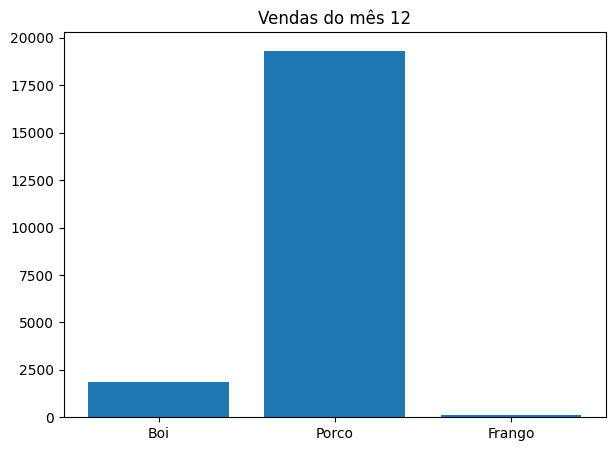

No período em análise foram vendidas 1,841 toneladas de carne de boi, 19,326 toneladas de carne de porco e 137 toneladas de carne de frango.


In [75]:
from matplotlib import pyplot as plt
import pandas as pd

# Função para calcular as perdas (como osso, sangue, gordura e etc.)
def descontar(quantidadeOriginal, porcentagem):
    quantidadeDespesa = quantidadeOriginal * porcentagem
    quantidadeDespesa = quantidadeDespesa / 100
    quantidadeTotal = quantidadeOriginal - quantidadeDespesa
    return quantidadeTotal

for i in range(1, 13):
    # Carregar o arquivo CSV para cada mês
    arquivo = pd.read_csv(f'vendas_mes_{i}.csv', sep=",")
    
    # Substituir vírgulas por pontos e converter para numérico
    arquivo['Quantidade'] = arquivo['Quantidade'].replace(',', '.', regex=True)
    arquivo['Quantidade'] = pd.to_numeric(arquivo["Quantidade"], errors='coerce')

    # Filtrar as carnes por tipo
    cnBoi = arquivo[arquivo['Tipo'].str.lower() == 'boi']
    cnPorco = arquivo[arquivo['Tipo'].str.lower() == 'porco']
    cnFrango = arquivo[arquivo['Tipo'].str.lower() == 'frango']

    # Somar a quantidade de carne no período analisado
    quantidadeBoi = cnBoi['Quantidade'].sum()
    quantidadePorco = cnPorco['Quantidade'].sum()
    quantidadeFrango = cnFrango['Quantidade'].sum()

    # Dados já tratados com as perdas
    boiDescontado = descontar(quantidadeBoi, 35)
    porcoDescontado = descontar(quantidadePorco, 22)

    # Dados para o gráfico e impressão
    labels = ["Boi", "Porco", "Frango"]
    valores = [boiDescontado, porcoDescontado, quantidadeFrango]
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.bar(labels, valores)
    plt.title(f"Vendas do mês {i}")
    plt.show()

    # Exibir valores com separador de milhares

    if i == 1:
        print("Vendas 2024")
    elif i == 2:
        print(" Teste sla")
    print(f"No período em análise foram vendidas {boiDescontado:,.0f} toneladas de carne de boi, "
          f"{porcoDescontado:,.0f} toneladas de carne de porco e {quantidadeFrango:,.0f} toneladas de carne de frango.")

